# Analysis of Novel Corona Virus

In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load `Novel Coronavirus (2019-nCoV) Cases, provided by JHU CSSE` Dataset

In [2]:
scope = [
'https://spreadsheets.google.com/feeds',
'https://www.googleapis.com/auth/drive',
]

json_file_name = 'gspread-266617-f39ee6d19800.json'
credentials = ServiceAccountCredentials.from_json_keyfile_name(json_file_name, scope)

gc = gspread.authorize(credentials)
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=sharing&sle=true#'
doc = gc.open_by_url(spreadsheet_url)

## Current Dataset Status

In [3]:
sheet_list = doc.worksheets()
sheet_nm = []
for i in sheet_list:
    sheet_nm.append(i.title)
print('sheets number :', len(sheet_list))
sheet_nm

sheets number : 19


['Jan29_9pm',
 'Jan29_230pm',
 'Jan29_130pm',
 'Jan28_11pm',
 'Jan28_6pm',
 'Jan28_1pm',
 'Jan27_830pm',
 'Jan27_7pm',
 'Jan27_9am',
 'Jan26_11pm',
 'Jan26_11am',
 'Jan25_10pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12pm',
 'Jan24_12am',
 'Jan23_12pm',
 'Jan22_12pm',
 'Jan22_12am']

## Convert to pandas DataFrame

In [4]:
df_list = []
for i in sheet_nm:
    
    print(i)
    
    data = doc.worksheet(i).get_all_values()
    globals()[i] = pd.DataFrame(data[1:], columns=data[0])
    
    df_list.append(globals()[i])

Jan29_9pm
Jan29_230pm
Jan29_130pm
Jan28_11pm
Jan28_6pm
Jan28_1pm
Jan27_830pm
Jan27_7pm
Jan27_9am
Jan26_11pm
Jan26_11am
Jan25_10pm
Jan25_12pm
Jan25_12am
Jan24_12pm
Jan24_12am
Jan23_12pm
Jan22_12pm
Jan22_12am


In [5]:
for df in df_list:
    print(set(df.columns))

{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Province/State'}
{'Deaths', 'Recovered', 'Country/Region', 'Last Update', 'Confirmed', 'Suspected', 'Province/State'}
{'Deaths', 'Recover

## Only use datasets of the same type for analysis

- That is, data after 12 PM on January 23  
- Based on selecting only datasets that have the following columns in common.

```
'Province / State',
'Country / Region',
'Last Update',
'Confirmed',
'Deaths',
'Recovered'
```

## Exclude remaining datasets

In [6]:
rm_items = ['Jan22_12am','Jan22_12pm','Jan23_12pm']
for i in rm_items:
    sheet_nm.remove(i)
sheet_nm

['Jan29_9pm',
 'Jan29_230pm',
 'Jan29_130pm',
 'Jan28_11pm',
 'Jan28_6pm',
 'Jan28_1pm',
 'Jan27_830pm',
 'Jan27_7pm',
 'Jan27_9am',
 'Jan26_11pm',
 'Jan26_11am',
 'Jan25_10pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12pm',
 'Jan24_12am']

## Common column list

In [7]:
col_list=[
            'Province/State',
            'Country/Region',
            'Last Update',
            'Confirmed',
            'Deaths',
            'Recovered'
         ]

## Data integration

In [8]:
df = pd.DataFrame()
for i in sheet_nm:
    
    try:
        print('Complete :', i)
        globals()[i] = globals()[i][col_list]
        df = pd.concat([df, globals()[i]])
        
    except:
        print('Failed :', i)

df=pd.DataFrame(df,columns=col_list)
df.index = range(len(df))

Complete : Jan29_9pm
Complete : Jan29_230pm
Complete : Jan29_130pm
Complete : Jan28_11pm
Complete : Jan28_6pm
Complete : Jan28_1pm
Complete : Jan27_830pm
Complete : Jan27_7pm
Complete : Jan27_9am
Complete : Jan26_11pm
Complete : Jan26_11am
Complete : Jan25_10pm
Complete : Jan25_12pm
Complete : Jan25_12am
Complete : Jan24_12pm
Complete : Jan24_12am


In [9]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,1/29/2020 21:00,4586,162,90
1,Zhejiang,Mainland China,1/29/2020 21:00,428,,4
2,Guangdong,Mainland China,1/29/2020 21:00,311,,6
3,Henan,Mainland China,1/29/2020 21:00,278,2,2
4,Hunan,Mainland China,1/29/2020 21:00,277,,


In [10]:
df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
767,,Japan,1/24/2020 12:00 AM,2,,
768,,Thailand,1/24/2020 12:00 AM,4,,
769,,South Korea,1/24/2020 12:00 AM,1,,
770,,Singapore,1/24/2020 12:00 AM,1,,
771,,Vietnam,1/24/2020 12:00 AM,2,,


## Pre-processing

### Check dates and times in different formats

In [11]:
set(df['Last Update'])

{'1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00'}

### Standardize the dates and times

In [12]:
import datetime

date_list=[]
for i in df['Last Update']:
    
    try:
        a=datetime.datetime.strptime(i, "%m/%d/%Y %H:%M")
        b=datetime.datetime.strftime(a, "%Y-%m-%d %H:%M")

    except:
        a=datetime.datetime.strptime(i, "%m/%d/%Y %I:%M %p")
        b=datetime.datetime.strftime(a, "%Y-%m-%d %H:%M")
        
    date_list.append(b)

date_list

df['Last Update'] = date_list

In [13]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-01-29 21:00,4586,162,90
1,Zhejiang,Mainland China,2020-01-29 21:00,428,,4
2,Guangdong,Mainland China,2020-01-29 21:00,311,,6
3,Henan,Mainland China,2020-01-29 21:00,278,2,2
4,Hunan,Mainland China,2020-01-29 21:00,277,,


In [14]:
df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
767,,Japan,2020-01-24 00:00,2,,
768,,Thailand,2020-01-24 00:00,4,,
769,,South Korea,2020-01-24 00:00,1,,
770,,Singapore,2020-01-24 00:00,1,,
771,,Vietnam,2020-01-24 00:00,2,,


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 6 columns):
Province/State    772 non-null object
Country/Region    772 non-null object
Last Update       772 non-null object
Confirmed         772 non-null object
Deaths            772 non-null object
Recovered         772 non-null object
dtypes: object(6)
memory usage: 36.3+ KB


In [16]:
# Data type conversion
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed'] = pd.to_numeric(df['Confirmed'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Recovered'] = pd.to_numeric(df['Recovered'])

# Feature Engineering

df['D/C'] = (df['Deaths']/df['Confirmed'])*100
df['R/C'] = (df['Recovered']/df['Confirmed'])*100

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 8 columns):
Province/State    772 non-null object
Country/Region    772 non-null object
Last Update       772 non-null datetime64[ns]
Confirmed         769 non-null float64
Deaths            92 non-null float64
Recovered         152 non-null float64
D/C               92 non-null float64
R/C               152 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 48.4+ KB


### Create country-specific data sets

In [18]:
# List of Country/Region
country_list = list(set(df['Country/Region']))
country_list

['Mainland China',
 'United Arab Emirates',
 'Singapore',
 'Vietnam',
 'US',
 'Sri Lanka',
 'France',
 'Cambodia',
 'Macau',
 'Finland',
 'Ivory Coast',
 'Nepal',
 'Australia',
 'South Korea',
 'Taiwan',
 'Malaysia',
 'Thailand',
 'Germany',
 'Japan',
 'Hong Kong',
 'Canada']

In [19]:
df[df['Country/Region']=='US']

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
34,Washington,US,2020-01-29 21:00:00,1.0,NaN,NaN,NaN,NaN
35,Illinois,US,2020-01-29 21:00:00,1.0,NaN,NaN,NaN,NaN
36,California,US,2020-01-29 21:00:00,2.0,NaN,NaN,NaN,NaN
37,Arizona,US,2020-01-29 21:00:00,1.0,NaN,NaN,NaN,NaN
89,Washington,US,2020-01-29 14:30:00,1.0,NaN,NaN,NaN,NaN
90,Illinois,US,2020-01-29 14:30:00,1.0,NaN,NaN,NaN,NaN
91,California,US,2020-01-29 14:30:00,2.0,NaN,NaN,NaN,NaN
92,Arizona,US,2020-01-29 14:30:00,1.0,NaN,NaN,NaN,NaN
143,Washington,US,2020-01-29 13:30:00,1.0,NaN,NaN,NaN,NaN
144,Illinois,US,2020-01-29 13:30:00,1.0,NaN,NaN,NaN,NaN


In [20]:
for i in country_list:
    globals()[i.replace(' ','_')] = df[df['Country/Region']==i]
    globals()[i.replace(' ','_')] = globals()[i.replace(' ','_')].sort_values('Last Update', ascending=True)
    globals()[i.replace(' ','_')].index = range(len(globals()[i.replace(' ','_')]))    
    print(i.replace(' ','_'))

Mainland_China
United_Arab_Emirates
Singapore
Vietnam
US
Sri_Lanka
France
Cambodia
Macau
Finland
Ivory_Coast
Nepal
Australia
South_Korea
Taiwan
Malaysia
Thailand
Germany
Japan
Hong_Kong
Canada


## Hubei

In [21]:
Hubei = Mainland_China[Mainland_China['Province/State']=='Hubei']
Hubei.index = range(len(Hubei))
Hubei

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
0,Hubei,Mainland China,2020-01-24 00:00:00,549.0,24.0,31.0,4.371585,5.646630
1,Hubei,Mainland China,2020-01-24 12:00:00,549.0,24.0,31.0,4.371585,5.646630
2,Hubei,Mainland China,2020-01-25 00:00:00,729.0,39.0,32.0,5.349794,4.389575
3,Hubei,Mainland China,2020-01-25 12:00:00,761.0,40.0,32.0,5.256242,4.204993
4,Hubei,Mainland China,2020-01-25 22:00:00,1052.0,52.0,42.0,4.942966,3.992395
5,Hubei,Mainland China,2020-01-26 11:00:00,1058.0,52.0,42.0,4.914934,3.969754
6,Hubei,Mainland China,2020-01-26 23:00:00,1423.0,76.0,44.0,5.340829,3.092059
7,Hubei,Mainland China,2020-01-27 09:00:00,1423.0,76.0,45.0,5.340829,3.162333
8,Hubei,Mainland China,2020-01-27 19:00:00,1423.0,76.0,45.0,5.340829,3.162333
9,Hubei,Mainland China,2020-01-27 20:30:00,2714.0,100.0,47.0,3.684598,1.731761


## South Korea

In [22]:
South_Korea

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,D/C,R/C
0,,South Korea,2020-01-24 00:00:00,1.0,NaN,NaN,NaN,NaN
1,,South Korea,2020-01-24 12:00:00,2.0,NaN,NaN,NaN,NaN
2,,South Korea,2020-01-25 00:00:00,2.0,NaN,NaN,NaN,NaN
3,,South Korea,2020-01-25 12:00:00,3.0,NaN,NaN,NaN,NaN
4,,South Korea,2020-01-25 12:00:00,2.0,NaN,NaN,NaN,NaN
5,,South Korea,2020-01-26 11:00:00,3.0,NaN,NaN,NaN,NaN
6,,South Korea,2020-01-26 23:00:00,3.0,NaN,NaN,NaN,NaN
7,,South Korea,2020-01-27 09:00:00,4.0,NaN,NaN,NaN,NaN
8,,South Korea,2020-01-27 19:00:00,4.0,NaN,NaN,NaN,NaN
9,,South Korea,2020-01-27 20:30:00,4.0,NaN,NaN,NaN,NaN


## Visualization

In [42]:
class corona():
    
    def __init__(self, data_nm):
        
        # set dataset
        self.data_nm = data_nm
        self.dataset = globals()[self.data_nm].copy()
        
        # set date index
        self.dataset.index = self.dataset['Last Update']
        self.dataset.index = self.dataset.index.astype("category")
        self.objects = list(self.dataset.index)
        self.y_pos = np.arange(len(self.objects))        
    
    def plot_confirmed(self):

        plt.figure(figsize=(10,5))
        plt.title(self.data_nm+'(Confirmed)', size='25', weight='bold')
        plt.plot(self.y_pos, self.dataset['Confirmed'], color='dodgerblue', linewidth=3)
        plt.xticks(y_pos, objects, rotation=45)
        plt.xlabel('Reported Time', size='20')
        plt.ylabel('Count', size='20')
        plt.show()

    def plot_deaths_recovered(self):
        
        plt.figure(figsize=(10,5))
        plt.title(self.data_nm+'(Deaths, Recovered)', size='25', weight='bold')
        plt.plot(self.y_pos, self.dataset['Deaths'], color='tomato', label='Deaths', linewidth=3)
        plt.plot(self.y_pos, self.dataset['Recovered'], color='orange', label='Recovered', linewidth=3)
        plt.legend(loc='upper left')
        plt.xticks(y_pos, objects, rotation=45)
        plt.xlabel('Reported Time', size='20')
        plt.ylabel('Count', size='20')
        plt.show()
        
    def plot_dc_rc(self):
        plt.figure(figsize=(10,5))
        plt.title(self.data_nm+'(D/C, R/C)', size='25', weight='bold')
        plt.plot(self.y_pos, self.dataset['D/C'], color='tomato', label='D/C', linewidth=3)
        plt.plot(self.y_pos, self.dataset['R/C'], color='orange', label='R/C', linewidth=3)
        plt.legend(loc='upper left')
        plt.xticks(y_pos, objects, rotation=45)
        plt.xlabel('Reported Time', size='20')
        plt.ylabel('Indicator values', size='20')
        plt.show()

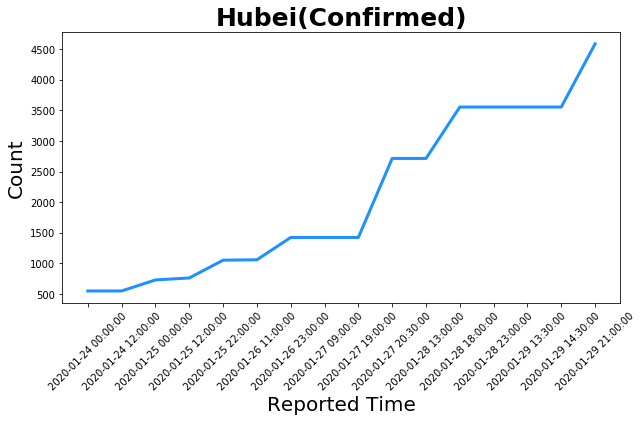

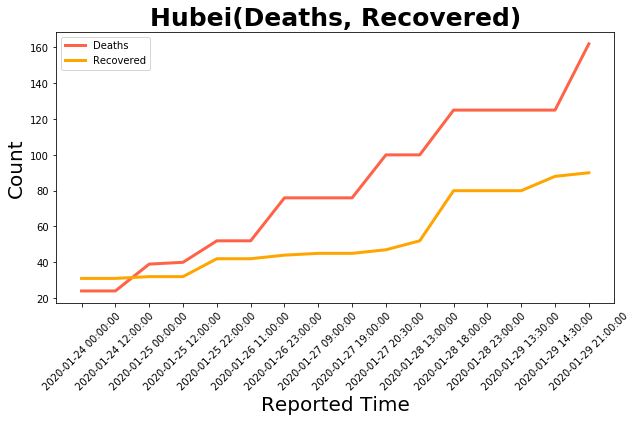

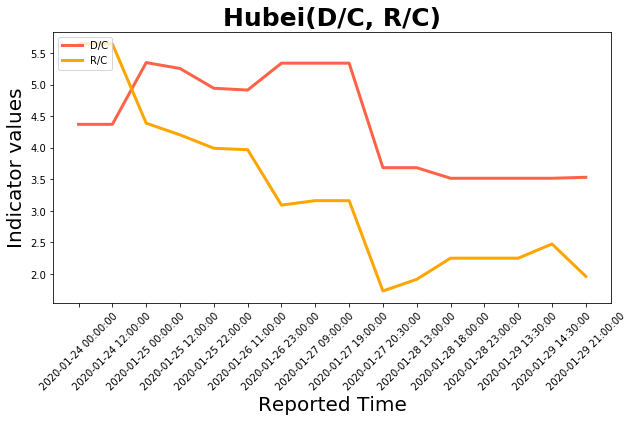

In [43]:
h=corona('Hubei')
h.plot_confirmed()
h.plot_deaths_recovered()
h.plot_dc_rc()